# SVMs with MNIST dataset

We use the MNIST database of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. Each image in both the training and test dataset is a 28x28 pixel image centered in using center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

The aim of the project is to use SVC and LinearSVC classifiers provided in the library 'sklearn' to classify MNIST dataset.

### Difference between SVC and LinearSVC for multi-class classification:

SVC:

* The SVC aka C-support Vector classification where 'C' is the regularisation parameters which help implement a penalty on the misclassifications that are performed while separating the classes. Thus helps in improving the accuracy of the output. The SVC uses a "one-against-one" aka OvO approach for multi class classification and also if "n" is the number of classes then n*(n-1)/2 binary classifiers will be constructed.
* In "one-vs-one" classifier, we train train a separate classifier for each different pair of labels. Suppose we have 3 classes (class 0, class 1, class 2), then class 0 will be classified with each other clases such as class 1, class2. Similarly class 2 will be classified with class 1, class 0.
* The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

LinearSVC:

* Linear SVC is similar to SVC and uses a "linear" kernel but has a slightly different implementation.
* LinearSVC handles multiclass support using one-vs-the-rest scheme.
* The "one-vs.-rest" or OvA or OvR, strategy involves training a single classifier per class, with the samples of that class as positive samples and all other samples as negatives. Suppose we have 3 classes (class 0, class 1, class 2), then class 0 will be classified with rest of the classes as negatives.

## Import MNIST dataset

In [1]:
#import and convert data to proper python dataset
import numpy as np
from mnist import MNIST
import time
import math

# Using the MNIST package to import the mnist train dataset and labels.
mndata = MNIST('train_images')
images_train, labels_train = mndata.load_training()

# Converting the train dataset in LIST format to numpy matrix for computational ease
images_train = np.array(images_train, dtype=np.float32).reshape((60000,784))
labels_train = np.array(labels_train, dtype=np.int)

# Using the MNIST package to import the mnist test dataset and labels.
mndata1 = MNIST('test_images')
images_test, labels_test = mndata1.load_testing()

# Converting the test dataset in LIST format to numpy matrix for computational ease
images_test = np.array(images_test, dtype=np.float32).reshape((10000,784))
labels_test = np.array(labels_test, dtype=np.int)

### Below we have used LinearSVC to classify the MNIST test data. We have trained the classifier on the 60,000 training images, then tested on the 10,000 testing images and finally we have ploted overall training and testing accuracy versus input parameter C on the same plot.

As C increases, the bias reduces and variance increases and viceversa.

In [2]:
import sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# take the initial parameters
C_list_linSVM = np.logspace(-2, 2, 5)
Acc_list_linSVM = []
clf_coeffs_linSVM = []

# for each value of C, fit a linear SVM model and find the testing accuracy.
for C in C_list_linSVM:
    clf_linSVM = LinearSVC(dual=False,C=C)
    # Fit the linear SVM model
    clf_linSVM.fit(images_train, labels_train)
    
    # get the coefficients
    clf_coeffs_linSVM.append(clf_linSVM.coef_)
    
    # make the predictions on testing data
    y_pred_linSVM = clf_linSVM.predict(images_test)
    
    # calculate the overall accuracy of the model
    Acc_list_linSVM.append(accuracy_score(labels_test, y_pred_linSVM))

In [3]:
import matplotlib.pyplot as py
import pandas as pd

# plot the graph of Accuracy vs C(log scale)
py.title("Accuracy(%) VS C")
py.xlabel("C (log scale)")
py.ylabel("Accuracy(%)")
py.plot(np.log(C_list_linSVM),np.array(Acc_list_linSVM)*100)
py.show()

# print the accuracy data as a table
df_linSVM = pd.DataFrame(np.reshape(list(C_list_linSVM)+Acc_list_linSVM,(2,5)).T)
df_linSVM.columns = ['C','Accuracy(%)']
print(df_linSVM)

<Figure size 640x480 with 1 Axes>

        C  Accuracy(%)
0    0.01       0.9172
1    0.10       0.9172
2    1.00       0.9170
3   10.00       0.9170
4  100.00       0.9163


As we can see from above results, A lower value of 'C=0.01 and C=0.1' in this case is yielding slightly higher accuracy than higher values of C. That implies higher bias and lower variance in the dataset.

Below we are showing the images of 10 co-efficients of the linearSVM classifier. These are the model vectors learned by SVM. As we can see from the images, these co-efficients are similar to that of logistic regression.

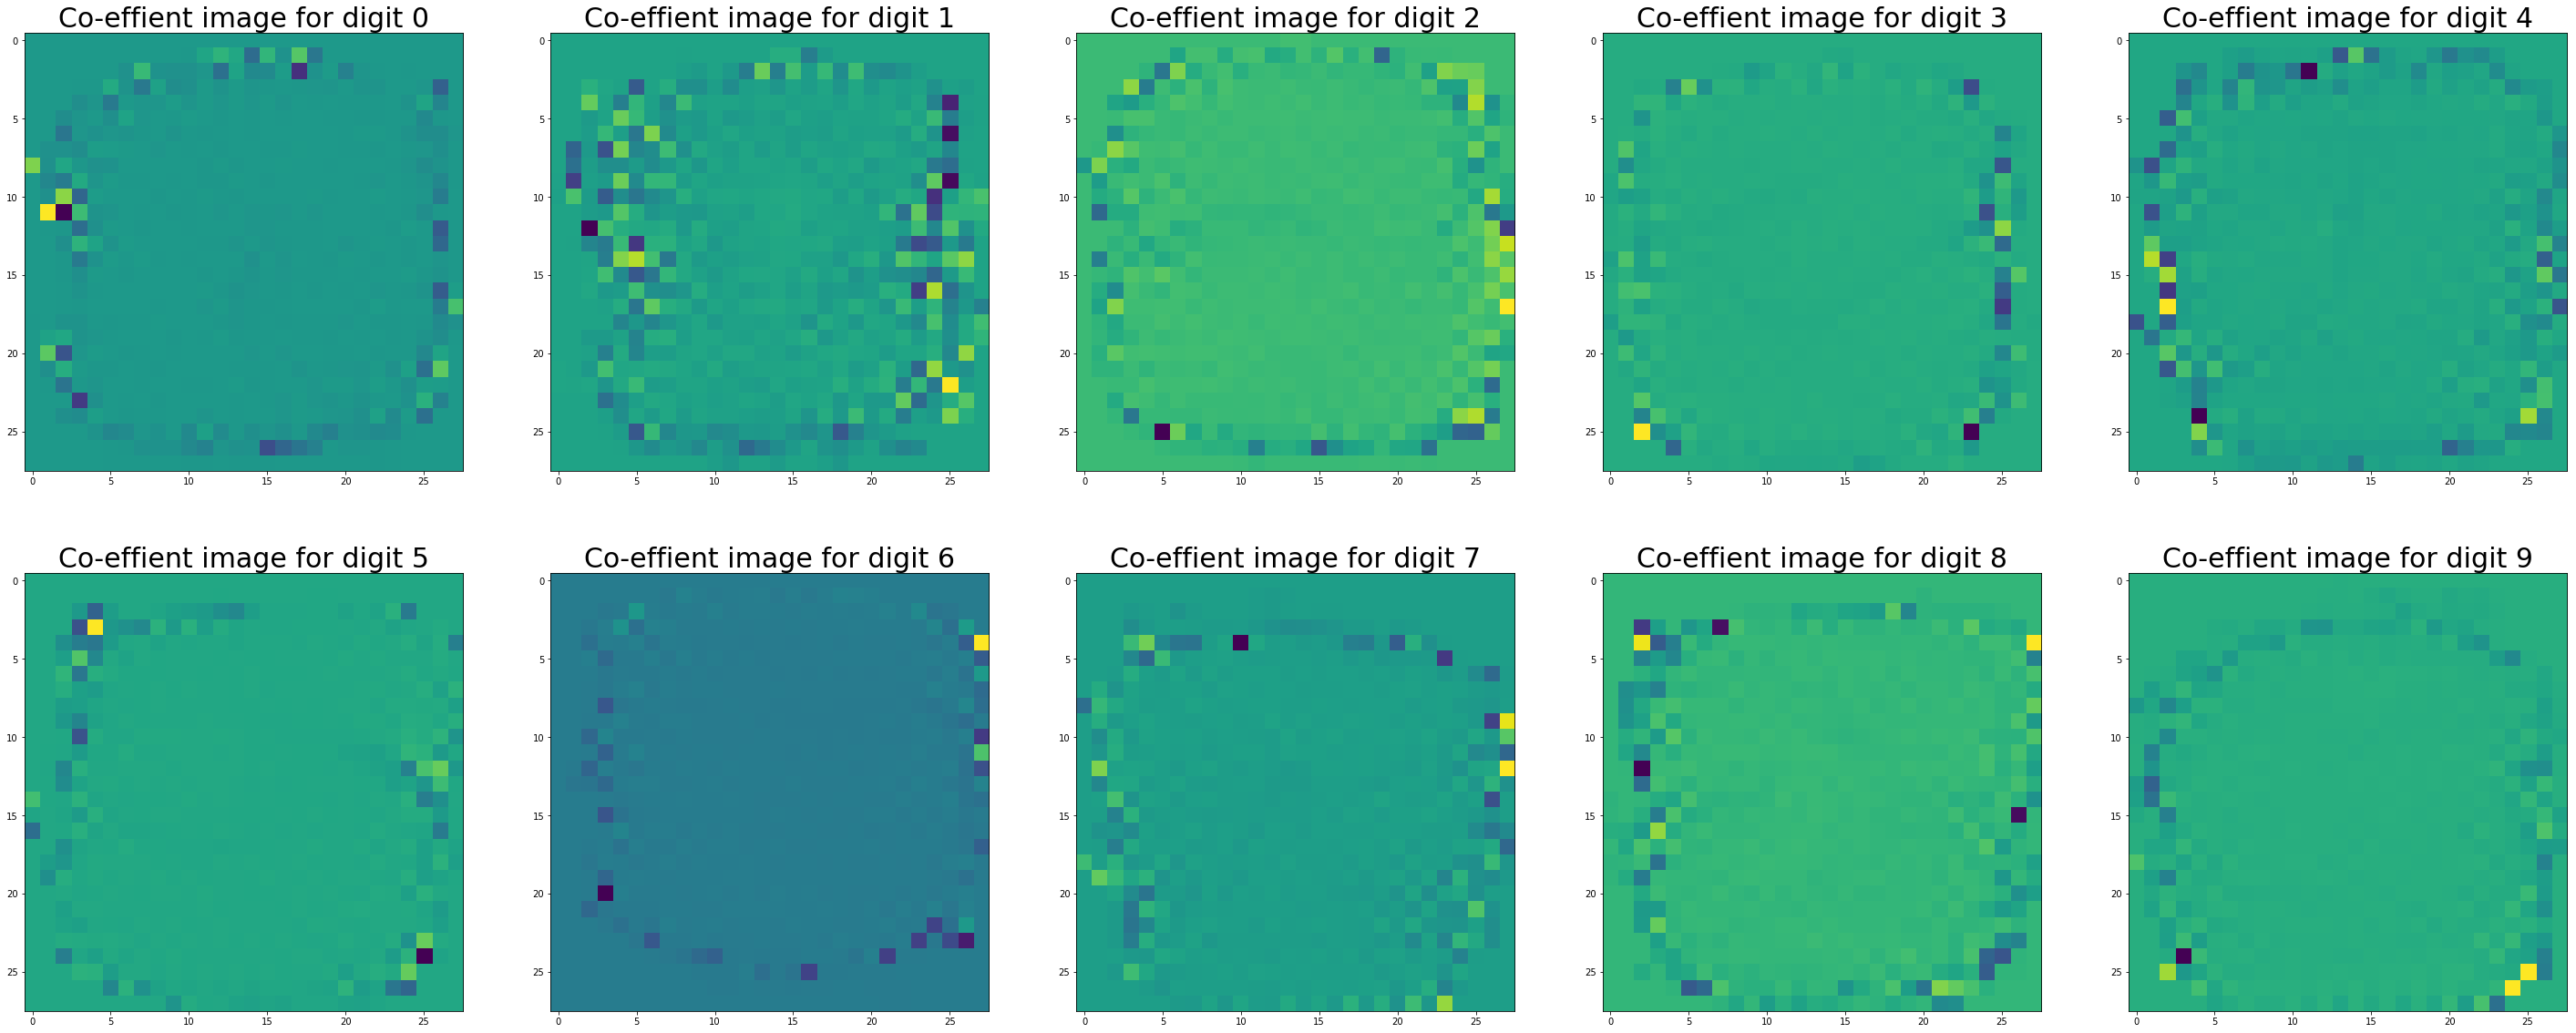

In [4]:
fig1 = py.figure(figsize=(50,20))
for i in range(10):
    ax = fig1.add_subplot(2,5,i+1)       
    
    # Display the co-effients as images for C=0.01 
    ax.imshow(clf_coeffs_linSVM[0][i].reshape((28,28)))
    ax.set_title("Co-effient image for digit "+str(i),fontsize=30)

py.show()

### Below we have changed the penalty parameter to 'l1' and again repeating the experiment conducted above using LinearSVC classifier for same values of C

In [5]:
# Get the initial parameters
C_list_l1 = np.logspace(-2, 2, 5)
Acc_list_l1 = []
clf_coeffs_l1 = []

# for each value of C, fit a linear SVM model and find the testing accuracy and the penalty parameter is set to 'l1' rather a square hinge loss penalty.
for C_l1 in C_list_l1:
    clf_l1 = LinearSVC(dual=False,C=C_l1,penalty='l1')
    
    # Fit the model
    clf_l1.fit(images_train, labels_train)
    
    # Get the co-efficients
    clf_coeffs_l1.append(clf_l1.coef_)
    
    # predict the output of the classifier on test images
    y_pred_svm_l1 = clf_l1.predict(images_test)
    
    # calculate accuracy of the classifier for given C value
    Acc_list_l1.append(accuracy_score(labels_test, y_pred_svm_l1))

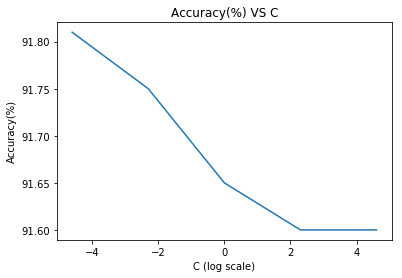

        C  Accuracy(%)
0    0.01       0.9181
1    0.10       0.9175
2    1.00       0.9165
3   10.00       0.9160
4  100.00       0.9160


In [6]:
import matplotlib.pyplot as py
import pandas as pd

# plot the graph of Accuracy vs C(log scale)
py.title("Accuracy(%) VS C")
py.xlabel("C (log scale)")
py.ylabel("Accuracy(%)")
py.plot(np.log(C_list_l1),np.array(Acc_list_l1)*100)
py.show()

# print the accuracy data as a table
df_l1 = pd.DataFrame(np.reshape(list(C_list_l1)+Acc_list_l1,(2,5)).T)
df_l1.columns = ['C','Accuracy(%)']
print(df_l1)

As we can see from above results, A lower value of 'C=0.01' in this case is yielding higher accuracy than higher values of C. That implies higher bias and lower variance in the dataset.

Below we are showing the images of 10 co-efficients of the linearSVM classifier. These are the model vectors learned by SVM. As we can see from the images, these co-efficients are hard to compare to that of logistic regression and hence difficult to come to a conclusion.

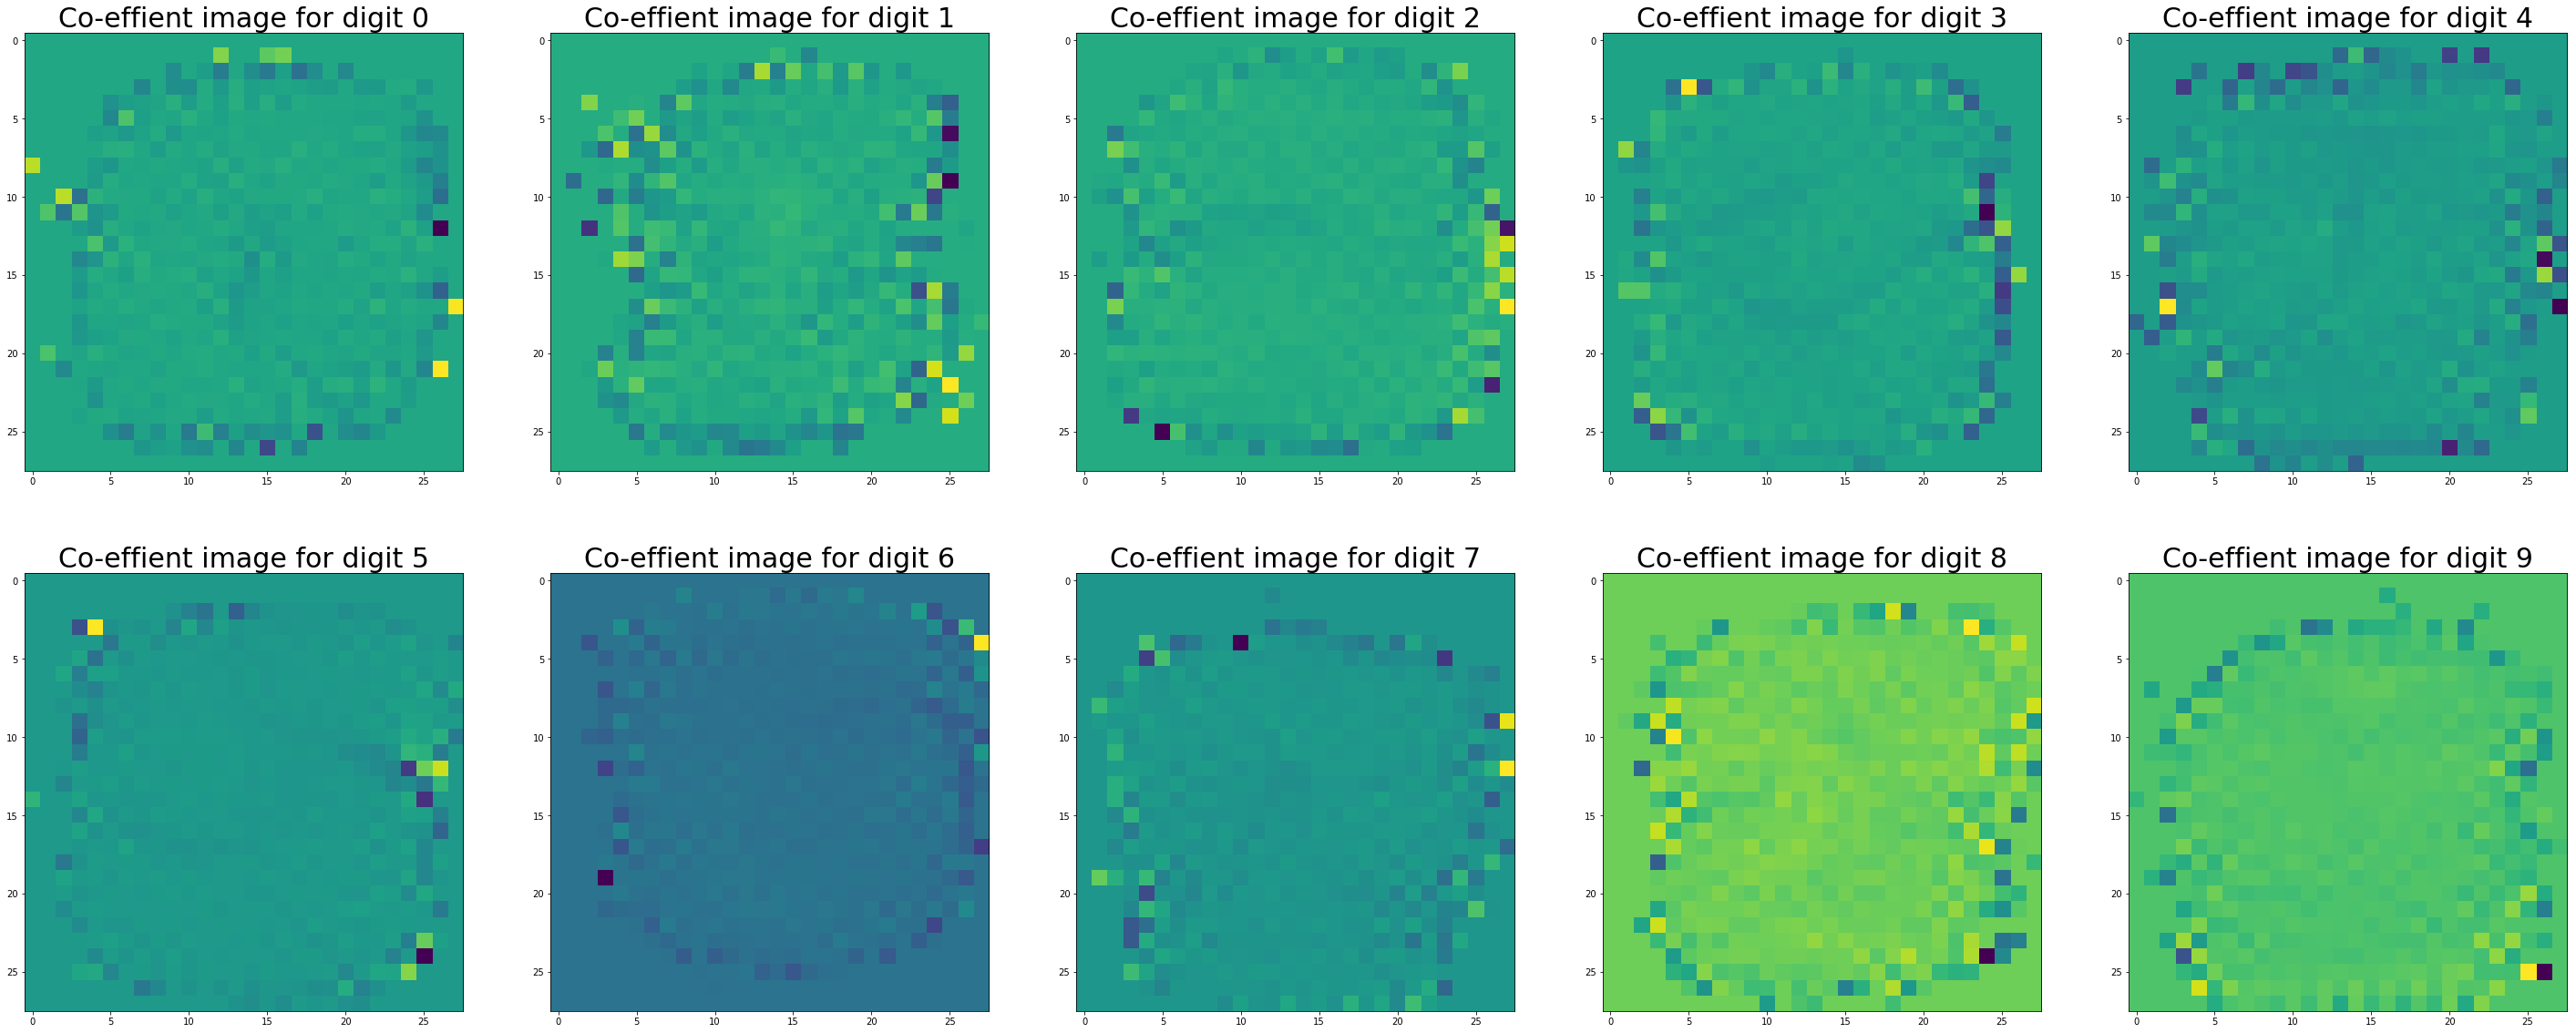

In [7]:
fig1 = py.figure(figsize=(50,20))
for i in range(10):
    ax = fig1.add_subplot(2,5,i+1)       
    
    # Display the co-effients as images for C=0.01 
    ax.imshow(clf_coeffs_l1[0][i].reshape((28,28)))
    ax.set_title("Co-effient image for digit "+str(i),fontsize=30)

py.show()

# Using SVC to classify the MNIST data

### For this part, We use the default RBF kernel and perform a grid search over several values of C and gamma, reporting both the overall training and testing accuracy in a table.

### Using inbuilt GridsearchCV functionality of sklearn library: This does not provide n_support vectors and other such attributes but i have used this to showcase the functionality to get the best optium classifier.

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Sample the input data to 5000 samples as the execution time increases exponentially with training samples
rand_index_grid = np.random.randint(60000, size=5000)

# set the parameters to be passed to the estimator
parameters_grid = {'C': [0.01, 0.1, 1, 10,100], 'gamma': [0.0001, 0.001,0.01,0.1,1], 'kernel': ['rbf']}
svc_grid = SVC()

# Perform a 3fold CV grid search and obtain the best parameter and accuracy
clf_svc_grid = GridSearchCV(svc_grid, parameters_grid)

# Fit the model
clf_svc_grid.fit(images_train[rand_index_grid]/255, labels_train[rand_index_grid])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
# Print the best parameters values along with the overall accuracy of the best classifier using inbuilt GridSearchCV option.
print("Best parameter values are:")
print(clf_svc_grid.best_params_)
print("\nAccuracy of the best classifier using GridsearchCV: "+str(accuracy_score(labels_test,clf_svc_grid.best_estimator_.predict(images_test/255))*100))

Best parameter values are:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Accuracy of the best classifier using GridsearchCV: 95.67999999999999


### For this part, We use the default RBF kernel and perform a grid search over several values of C and gamma, reporting both the overall training and testing accuracy in a table.¶

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Sample the input data to 5000 samples as the execution time increases exponentially with training samples
rand_index = np.random.randint(60000, size=5000)
train_sampled = images_train[rand_index]/255
train_labels_sampled = labels_train[rand_index]

acc_svc_test = []
acc_svc_train = []
models = []

# Get the input parameters for C and Gamma
C_list = [0.01, 0.1, 1, 10,100]
gamma_list = [0.0001, 0.001,0.01,0.1,1]

# For each value of C and Gamma, fit an SVC classifier and also calculate training and testing accuracy.
for C in C_list:
    for gamma in gamma_list:
        clf_svc = SVC(C=C,gamma=gamma,kernel='rbf')
        models.append(clf_svc)
        
        # Fit the model with given parameters
        clf_svc.fit(train_sampled, train_labels_sampled)
        
        # get the predictions for test image
        pred = clf_svc.predict(images_test/255)
        
        # get the predictions for train image
        pred_train = clf_svc.predict(train_sampled)
        
        # Calculate accuracy for training and testing data
        acc_svc_test.append(accuracy_score(labels_test, pred)*100)
        acc_svc_train.append(accuracy_score(train_labels_sampled, pred_train)*100)

In [11]:
import pandas as pd

# Using pandas dataframe, we are displaying the Accuracy(%) for given C and Gamma as a table
print("Testing Accuracy(%) for given C and Gamma values\n\n")
df = pd.DataFrame(np.reshape(acc_svc_test,(5,5)))
df.columns = ['Gamma = 0.0001','Gamma=0.001','Gamma=0.01','Gamma=0.1','Gamma=1']
df.insert(0,'C',C_list)
df = df.set_index('C')
print(df)

print("\n\nTraining Accuracy(%) for given C and Gamma values\n\n")
df = pd.DataFrame(np.reshape(acc_svc_train,(5,5)))
df.columns = ['Gamma = 0.0001','Gamma=0.001','Gamma=0.01','Gamma=0.1','Gamma=1']
df.insert(0,'C',C_list)
df = df.set_index('C')
print(df)

Testing Accuracy(%) for given C and Gamma values


        Gamma = 0.0001  Gamma=0.001  Gamma=0.01  Gamma=0.1  Gamma=1
C                                                                  
0.01             11.35        11.35       53.51      11.35    11.35
0.10             11.35        74.45       91.15      29.71    11.35
1.00             75.64        90.68       94.80      85.39    11.35
10.00            90.51        92.80       95.79      86.06    11.35
100.00           92.31        92.93       95.78      86.06    11.35


Training Accuracy(%) for given C and Gamma values


        Gamma = 0.0001  Gamma=0.001  Gamma=0.01  Gamma=0.1  Gamma=1
C                                                                  
0.01             11.22        11.22       53.94      11.22    11.22
0.10             11.22        75.62       91.80      30.68    11.22
1.00             76.56        91.46       97.90     100.00   100.00
10.00            91.24        95.66      100.00     100.00   100.00
100.00     

#### From the above results we would select a value C=10, gamma=0.01 as it offers highest accuracy of 95.43%. This implies that As C increases, the bias reduces and variance increases and viceversa.

### Code to get the nsupport and dualcoef to get the support vectors and based on dual_coef we can determine the training objects that act as support vectors.

The n_support vectors for the best classifier C=10 and Gamma=0.01 values are as shown below:
[179 142 236 287 263 324 229 210 282 280]



The dual_coef vectors for the best classifier C=10 and Gamma=0.01 values are as shown below:
[[ 0.          0.          0.         ... -0.         -0.
  -0.00323782]
 [ 0.          0.36698313  0.86518779 ... -0.         -0.
  -0.26900444]
 [ 0.          0.53318563  0.41895775 ... -0.         -0.
  -0.18110225]
 ...
 [ 0.          0.          0.06561701 ... -0.         -0.
  -0.        ]
 [ 0.          0.          0.         ... -0.         -0.
  -1.        ]
 [ 0.          0.14791787  0.         ... -0.74827359 -1.
  -0.        ]]




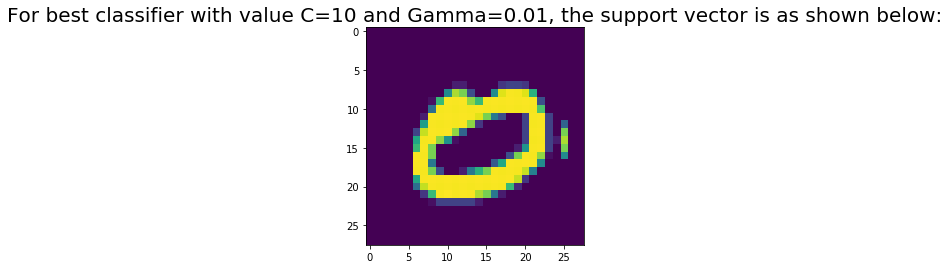

In [12]:
# Print the n_support vectors for the best classifier
print("The n_support vectors for the best classifier C=10 and Gamma=0.01 values are as shown below:")
print(models[12].n_support_)

# Print the dual_coef arrays for the best classifier
print("\n\n")
print("The dual_coef vectors for the best classifier C=10 and Gamma=0.01 values are as shown below:")
print(models[12].dual_coef_)
print("\n")

# Show the image of the support vector of the best classifier for a single digit
py.title("For best classifier with value C=10 and Gamma=0.01, the support vector is as shown below:",fontsize=20)
py.imshow(np.reshape(models[12].support_vectors_[0],(28,28)))
py.show()

### For this part, We use the polynomial kernel and perform a grid search over several values of C and degree of polynomial, reporting both the overall training and testing accuracy in a table.¶

In [13]:
from sklearn.svm import SVC
import numpy as np

# Sample the input data to 5000 samples as the execution time increases exponentially with training samples
rand_index_poly = np.random.randint(60000, size=5000)
train_sampled_poly = images_train[rand_index_poly]/255
train_labels_sampled_poly = labels_train[rand_index_poly]

acc_svc_test_poly = []
acc_svc_train_poly = []
models_poly = []

# Get the input parameters for C and Gamma
C_list_poly = [0.01, 0.1, 1, 10,100]
degree_list_poly = [1, 2, 3, 4, 5]

# For each value of C and Degree of polynomial, fit an SVC classifier and also calculate training and testing accuracy.
for C in C_list_poly:
    for degree in degree_list_poly:
        clf_svc_poly = SVC(C=C,degree=degree,kernel='poly')
        models_poly.append(clf_svc_poly)
        
        # Fit the model with given parameters
        clf_svc_poly.fit(train_sampled_poly, train_labels_sampled_poly)
        
        # get the predictions for test images
        pred_poly = clf_svc_poly.predict(images_test/255)
        
        # get the predictions for train images
        pred_train_poly = clf_svc_poly.predict(train_sampled_poly)
        
        # Calculate overall accuracy for both testing and training data
        acc_svc_test_poly.append(accuracy_score(labels_test, pred_poly)*100)
        acc_svc_train_poly.append(accuracy_score(train_labels_sampled_poly, pred_train_poly)*100)

In [14]:
import pandas as pd

# Using pandas dataframe, we are displaying the Accuracy(%) for given C and Gamma as a table
print("Testing Accuracy(%) for given C and Gamma values\n\n")
df = pd.DataFrame(np.reshape(acc_svc_test_poly,(5,5)))
df.columns = ['Degree = 1','Degree=2','Degree=3','Degree=4','Degree=5']
df.insert(0,'C',C_list_poly)
df = df.set_index('C')
print(df)

print("\n\nTraining Accuracy(%) for given C and Gamma values\n\n")
df = pd.DataFrame(np.reshape(acc_svc_train_poly,(5,5)))
df.columns = ['Degree = 1','Degree=2','Degree=3','Degree=4','Degree=5']
df.insert(0,'C',C_list_poly)
df = df.set_index('C')
print(df)

Testing Accuracy(%) for given C and Gamma values


        Degree = 1  Degree=2  Degree=3  Degree=4  Degree=5
C                                                         
0.01         10.10     10.10     10.10     10.10     10.10
0.10         67.91     10.10     10.10     10.10     10.10
1.00         89.62     63.74     10.33     10.10     10.10
10.00        91.95     90.31     52.79     11.14     10.10
100.00       91.66     94.52     87.06     43.33     12.26


Training Accuracy(%) for given C and Gamma values


        Degree = 1  Degree=2  Degree=3  Degree=4  Degree=5
C                                                         
0.01         11.28     11.28     11.28     11.28     11.28
0.10         66.82     11.28     11.28     11.28     11.28
1.00         89.22     61.60     11.36     11.28     11.28
10.00        94.06     91.00     52.06     11.82     11.28
100.00       98.24     97.76     88.24     43.12     12.66


#### From the above results we would select a value C=100, Degree=2 as it offers highest accuracy of 94.50%. This implies that As C increases, the bias reduces and variance increases and viceversa. Also the second degree polynomial fit provides higher accuracy.

### Code to get the nsupport and dualcoef to get the support vectors and based on dual_coef we can determine the training objects that act as support vectors.

The n_support vectors for the best classifier C=100 and Degree=2 values are as shown below:
[100 134 206 225 221 266 156 183 238 247]



The dual_coef vectors for the best classifier C=100 and Degree=2 values are as shown below:
[[   0.           52.94631359    0.         ...  -92.60008132
    -0.           -0.        ]
 [  12.36734518   58.83969876    0.         ... -100.
    -0.           -0.        ]
 [   0.           83.67852956    0.         ... -100.
    -0.          -13.18740808]
 ...
 [   0.           51.86535424    0.         ...   -0.
    -0.           -0.        ]
 [   0.           26.57922069    0.         ... -100.
    -0.           -0.        ]
 [   0.           32.67521544    0.         ...   -0.
   -16.41955551   -0.        ]]




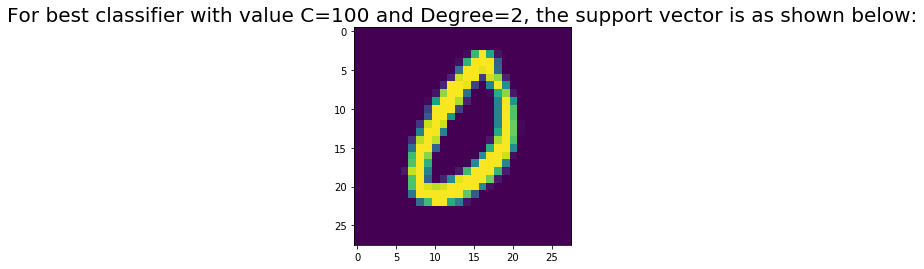

In [15]:
# Print the n_support vectors for the best classifier
print("The n_support vectors for the best classifier C=100 and Degree=2 values are as shown below:")
print(models_poly[21].n_support_)

# Print the dual_coef arrays for the best classifier
print("\n\n")
print("The dual_coef vectors for the best classifier C=100 and Degree=2 values are as shown below:")
print(models_poly[21].dual_coef_)
print("\n")

# Show the image of the support vector of the best classifier for a single digit
py.title("For best classifier with value C=100 and Degree=2, the support vector is as shown below:",fontsize=20)
py.imshow(np.reshape(models_poly[21].support_vectors_[0],(28,28)))
py.show()